In [1]:
import jax
import chex
import flax

from neat_jax import forward_pass
from typing import NamedTuple, List
from jax import random
import jax.numpy as jnp

In [2]:
class ConnectionGenes(NamedTuple):
    in_node: jnp.int32
    out_node: jnp.int32
    weight: jnp.float32
    enabled: jnp.bool_
    innovation_number: jnp.int32


class NodeGenes(NamedTuple):
    type: jnp.int32
    index: jnp.float32


class Genome:
    @staticmethod
    def forward(connection_genes: ConnectionGenes, node_genes: NodeGenes):
        pass

```python
compatibility = (c1 * n_excess)/N + (c2 * n_disjoint)/N + c3 * matching_weights
```

In [3]:
in_indexes = jnp.array([0, 1, 1, 2, 3])
out_indexes = jnp.array([3, 3, 4, 4, 4])
weights = jnp.ones(len(in_indexes))
enabled = jnp.array([True, True, False, True, True])
innov_index = jnp.array([0, 2, 3, 5, 6])

c_genes = ConnectionGenes(in_indexes, out_indexes, weights, enabled, innov_index)
c_genes

ConnectionGenes(in_node=Array([0, 1, 1, 2, 3], dtype=int32), out_node=Array([3, 3, 4, 4, 4], dtype=int32), weight=Array([1., 1., 1., 1., 1.], dtype=float32), enabled=Array([ True,  True, False,  True,  True], dtype=bool), innovation_number=Array([0, 2, 3, 5, 6], dtype=int32))

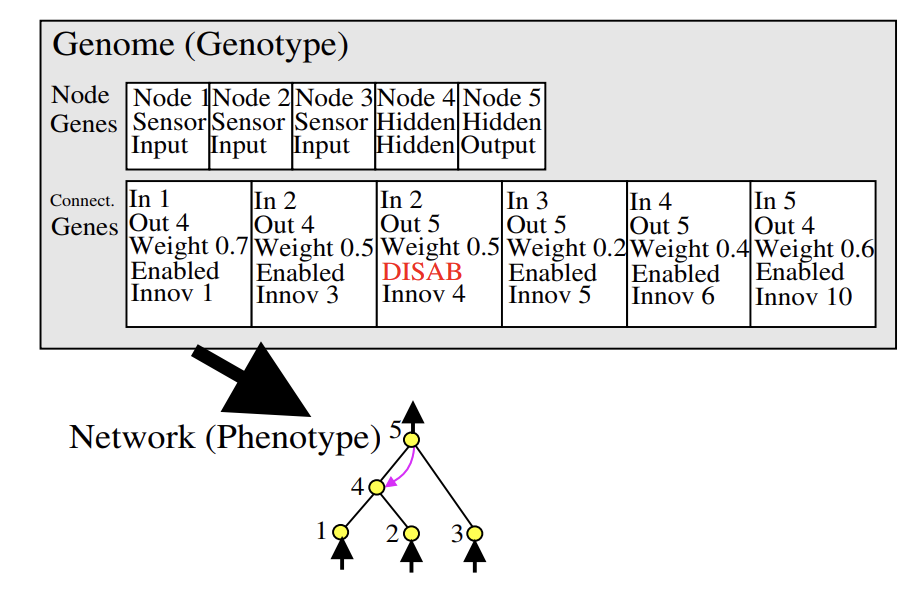

In [4]:
types = jnp.array([0, 0, 0, 1, 2])
n_genes = NodeGenes(types, jnp.arange(5))
n_genes

NodeGenes(type=Array([0, 0, 0, 1, 2], dtype=int32), index=Array([0, 1, 2, 3, 4], dtype=int32))

In [5]:
network_inputs = jnp.array([0.5, 0.8, 0.2])

activations = jnp.zeros(len(n_genes.index))
activations = activations.at[: len(network_inputs)].set(network_inputs)
activations

Array([0.5, 0.8, 0.2, 0. , 0. ], dtype=float32)

In [6]:
forward_pass(c_genes, activations)

Array(1.3377541, dtype=float32)

## ***Topological sort***

In [12]:
enabled_c_genes = jnp.where(c_genes.enabled == True)
jax.tree_map(lambda arr: arr[enabled_c_genes], [attr for attr in c_genes])

[Array([0, 1, 2, 3], dtype=int32),
 Array([3, 3, 4, 4], dtype=int32),
 Array([1., 1., 1., 1.], dtype=float32),
 Array([ True,  True,  True,  True], dtype=bool),
 Array([0, 2, 5, 6], dtype=int32)]

In [13]:
jax.tree_map(lambda arr: arr[enabled_c_genes], [attr for attr in n_genes])

[Array([0, 0, 1, 2], dtype=int32), Array([0, 1, 3, 4], dtype=int32)]

In [ ]:
def topological_sort(connection_genes: ConnectionGenes, node_genes: NodeGenes):
    enabled_genes_indices = jnp.where(connection_genes.enabled == True)
    enabled_c_genes = jax.tree_map(
        lambda arr: arr[enabled_genes_indices], [attr for attr in connection_genes]
    )
    enabled_n_genes = jax.tree_map(
        lambda arr: arr[enabled_genes_indices], [attr for attr in node_genes]
    )

    


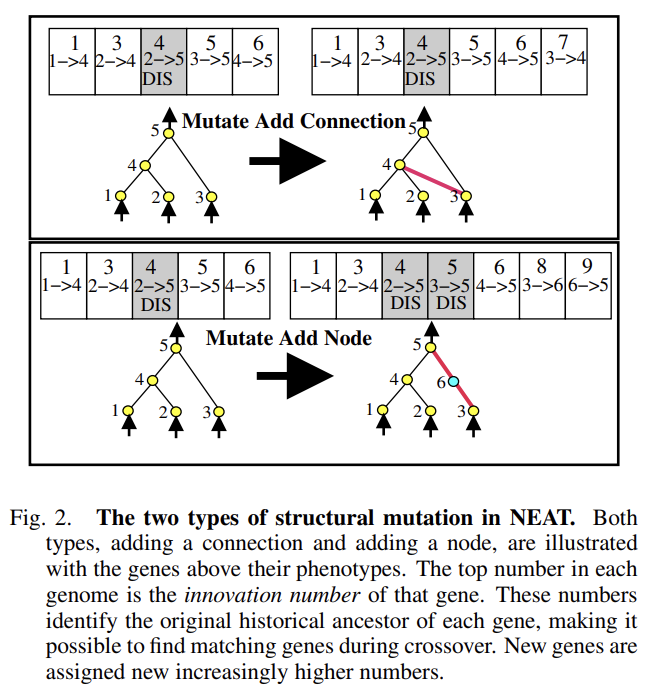

In [7]:
assert

SyntaxError: invalid syntax (2389114725.py, line 1)

## ***Mutation***

In [ ]:
def mutate(
    node_genes: NodeGenes,
    connection_genes: ConnectionGenes,
    key: random.PRGNKey,
):
    def _add_connection():
        pass

    def _add_node():
        new_connection_start = random.choice(key, mutable_genes, ())
        

    mutable_genes = jnp.where(node_genes.type != 2)
    innovation_idx = jnp.maximum(connection_genes.innovation_number) + 1

    #

    return jax.lax.switch(
        random.randint(key, (), 0, 2),
        [
            _add_connection,
            _add_node,
        ],
    )